In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
url = "C:/Users/chloe/Downloads/first_week.csv"
df = pd.read_csv(url)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
url = "C:/Users/chloe/Downloads/data_propres.csv"
df = pd.read_csv(url)

In [37]:
df['arrival_delay_minutes'] = df['arrival_delay']/60

In [38]:
df['arrival_delay_minutes'].describe()

count    24348.000000
mean         1.261571
std          2.307223
min         -9.916667
25%         -0.083333
50%          1.016667
75%          2.533333
max         10.000000
Name: arrival_delay_minutes, dtype: float64

In [39]:
from datetime import datetime

In [40]:
df['departure_time_real'] = df['departure_time_real'].astype('str')
df['arrival_time_real'] = df['arrival_time_real'].astype('str')

In [41]:
def func(val):
    if isinstance(val, str) and val != 'nan':
        return datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    else:
        return None

df['dwell_time'] = df['departure_time_real'].apply(func)-df['arrival_time_real'].apply(func)

In [42]:
df['dwell_time'].describe()

count                        24348
mean     0 days 00:00:24.928864793
std      0 days 00:00:41.922978855
min                0 days 00:00:00
25%                0 days 00:00:08
50%                0 days 00:00:14
75%                0 days 00:00:25
max                0 days 00:10:43
Name: dwell_time, dtype: object

In [43]:
df.head()

,Unnamed: 0,trip_id,start_date,schedule_relationship,stop_sequence_real,stop_id,arrival_time_real,arrival_delay,departure_time_real,departure_delay,...,drop_off_booking_rule_id,stop_name,stop_lat,stop_lon,location_type,parent_station,platform_code,file,arrival_delay_minutes,dwell_time
0,246,14010000664218434,20250310,0,1,9022001010262001,2025-03-10 06:02:14,-106.0,2025-03-10 06:04:03,3.0,...,NaN,Moa Martinsons torg,59.339563,18.004969,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-15-18Z.pb,-1.766667,0 days 00:01:49
1,247,14010000664218434,20250310,0,2,9022001010429004,2025-03-10 06:05:18,-10.0,2025-03-10 06:05:28,0.0,...,NaN,Strandbergsgatan,59.337527,18.008290,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-15-18Z.pb,-0.166667,0 days 00:00:10
2,254,14010000664218434,20250310,0,3,9022001010473002,2025-03-10 06:06:53,-10.0,2025-03-10 06:07:11,8.0,...,NaN,Lindhagensgatan,59.333497,18.016235,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-17-09Z.pb,-0.166667,0 days 00:00:18
3,264,14010000664218434,20250310,0,4,9022001010421001,2025-03-10 06:09:12,0.0,2025-03-10 06:09:21,9.0,...,NaN,Mariebergsgatan,59.331148,18.023381,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-19-58Z.pb,0.000000,0 days 00:00:09
4,268,14010000664218434,20250310,0,5,9022001010645001,2025-03-10 06:10:52,18.0,2025-03-10 06:11:04,30.0,...,NaN,Västerbroplan,59.327891,18.022024,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-21-35Z.pb,0.300000,0 days 00:00:12


In [44]:
df['stop_headsign'].unique()

array(['Sickla udde', 'Hornsberg', 'Henriksdalsberget', 'Ruddammen',
       'Karolinska institutet'], dtype=object)

In [45]:
#exclusion des bus stops passant par l'arrêt bizarre
list_trip_id = []
def do_you_stop(u) :
  if u['stop_name']=='Södersjukhuset':
    list_trip_id.append(u['trip_id'])
  elif u['stop_headsign'] in ['Sickla udde via Södersjukhuset','Hornsberg via Södersjukhuset']:
    list_trip_id.append(u['trip_id'])
  return None

df.apply(do_you_stop, axis=1)
list_trip_id = list(set(list_trip_id))


# Cleaning of the annoying trips

In [11]:
df = df_ini

NameError: name 'df_ini' is not defined

In [123]:
df_annoying = df.loc[(df['trip_id'].isin(list_trip_id) 
        & (~df['stop_name'].isin(['Södersjukhuset','Roselund','Södra station'])) )]

def annoying_trips(u):
    if u['stop_headsign'] in ['Sickla udde via Södersjukhuset']:
        return 'Sickla udde'
    if u['stop_headsign'] in ['Hornsberg via Södersjukhuset']:
        return 'Hornsberg'
    else:
        return u['stop_headsign']
    
def annoying_sequences(u):
    if u['stop_headsign'] not in ['Sickla udde via Södersjukhuset','Hornsberg via Södersjukhuset']:
        u['stop_sequence_sched']-=1
        
    return u['stop_sequence_sched']

df_annoying['stop_sequence_sched']= df_annoying.apply(annoying_sequences, axis=1)

df_annoying['stop_headsign'] = df_annoying.apply(annoying_trips, axis=1)

C:\Users\chloe\AppData\Local\Temp\ipykernel_45668\1755001313.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annoying['stop_headsign'] = df_annoying.apply(annoying_trips, axis=1)


In [124]:

df_clean = pd.concat([df_annoying,df[~df['trip_id'].isin(list_trip_id)]])


In [125]:
#getting rid of the outliers : the whole trip when there is a problem on one stop

outi = []
def outlier_cleaning(u):
    if np.abs(u['arrival_delay_minutes'])>10:
        outi.append(u['trip_id'])
    return None
df_clean.apply(outlier_cleaning, axis=1)
outi= list(set(outi))
df_clean = df_clean[~df_clean['trip_id'].isin(outi)]


In [126]:
df_clean.to_csv('data_propres.csv')

In [112]:
#df_ini = df 
df = df_clean

In [100]:
len(df_ini.loc[df_ini['route_short_name']==74]['trip_id'].unique())

119

In [101]:
len(list(set(list_trip_id)))

59

# Data processing

74
Sickla udde
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
74
Hornsberg
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
61
Hornsberg
[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27  1  2  3
  4  5  6]
61
Ruddammen
[18 19 20 21 22 23 24 25 26 27 28 29  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17]
53
Henriksdalsberget
[12 13 14 15 16 17 18 19 20 21 22  1  2  3  4  5  6  7  8  9 10 11]
53
Karolinska institutet
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22  1  2  3  4  5  6  7]


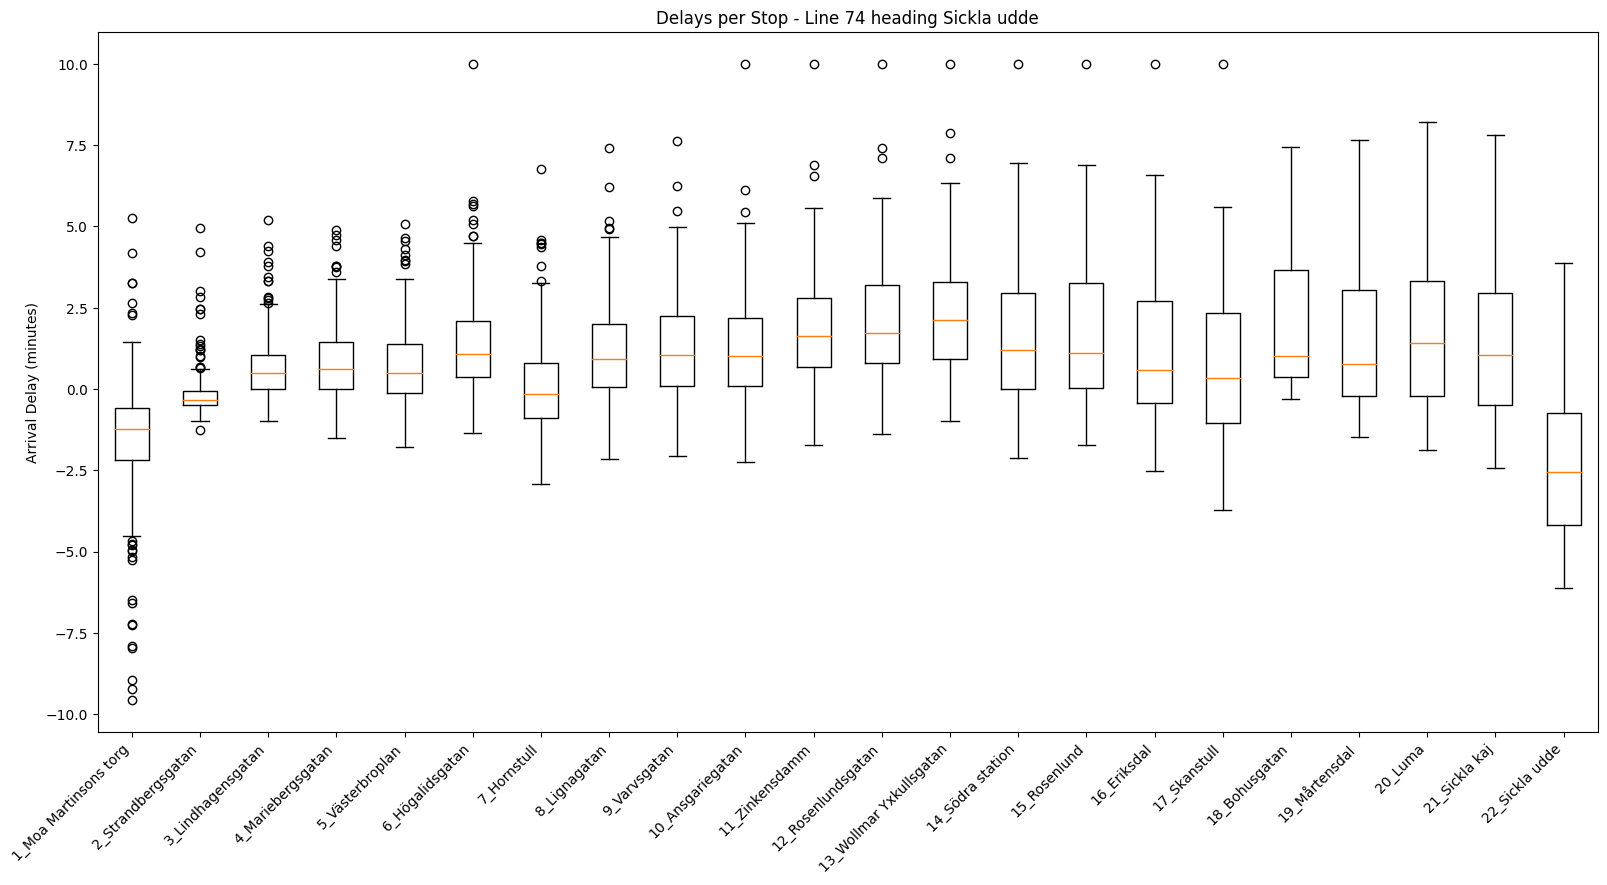

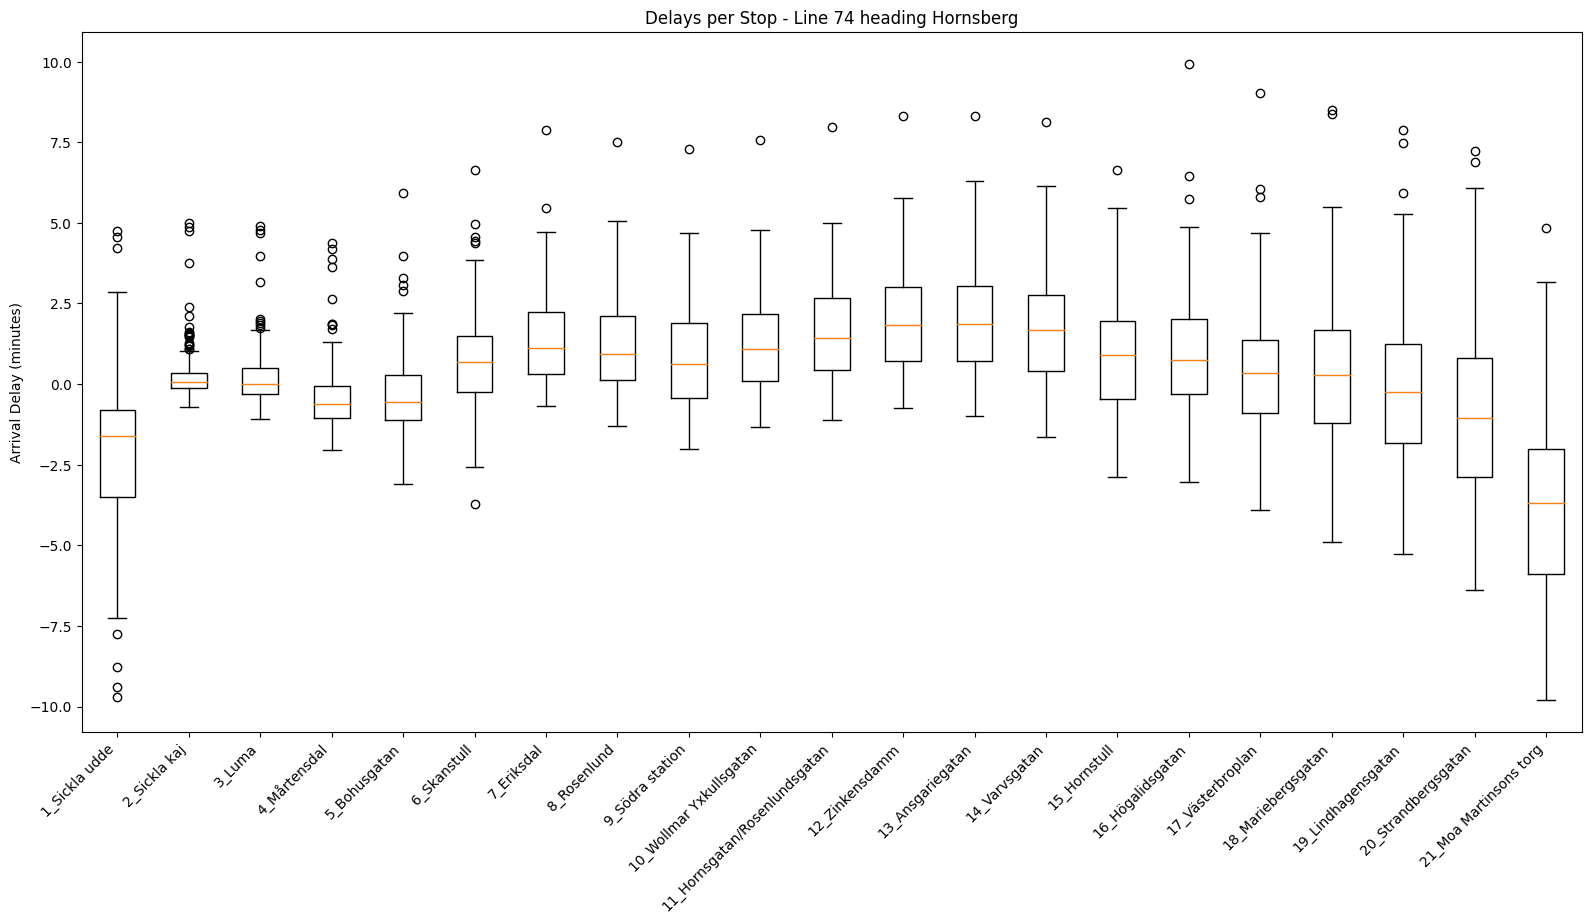

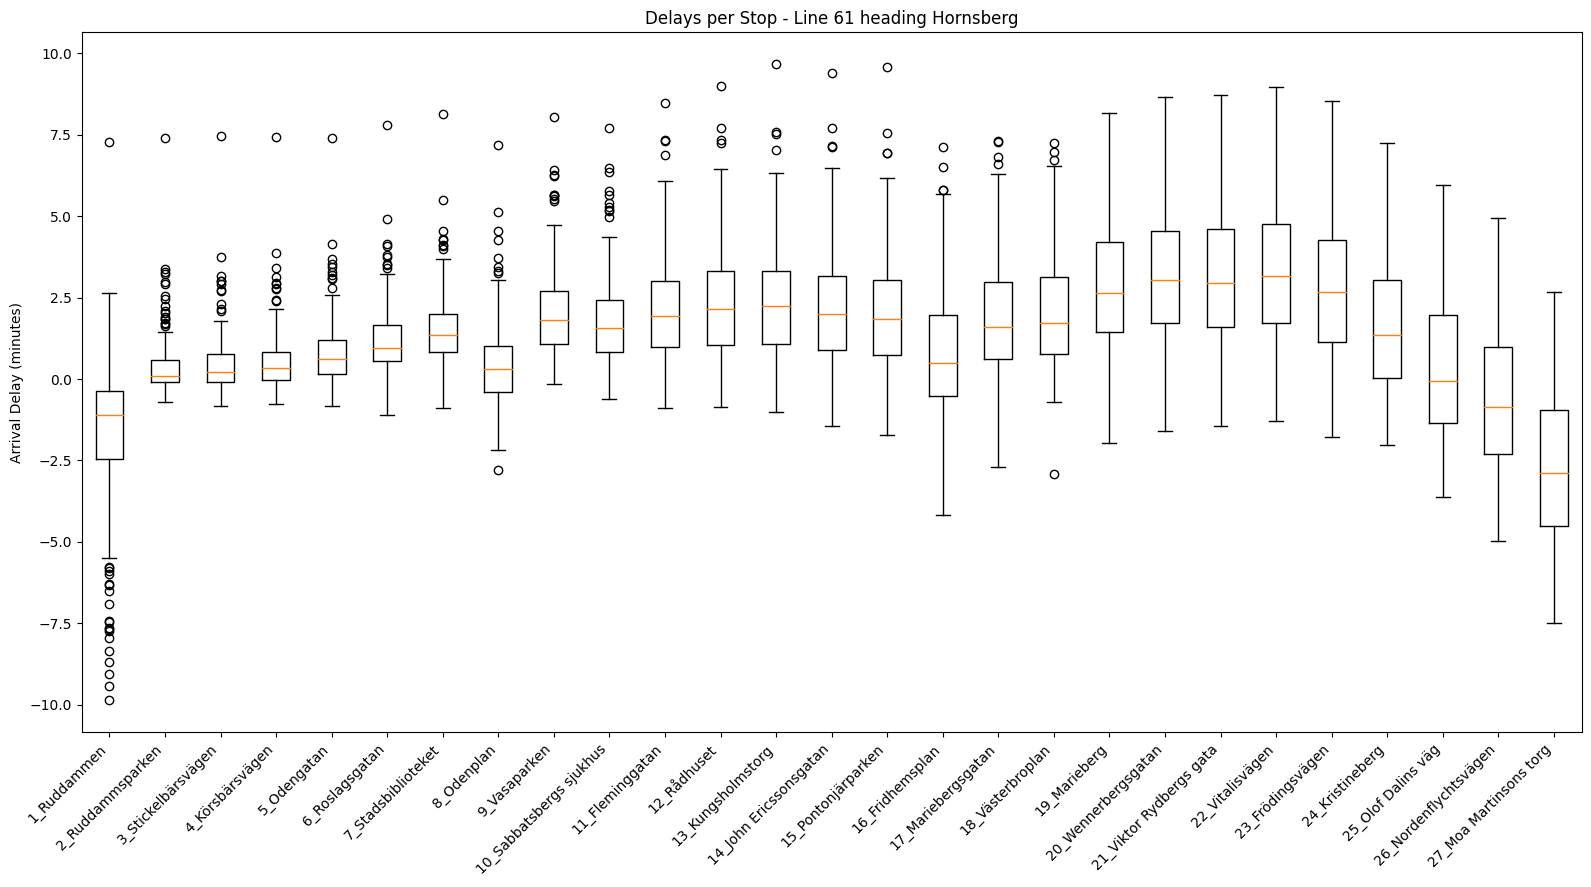

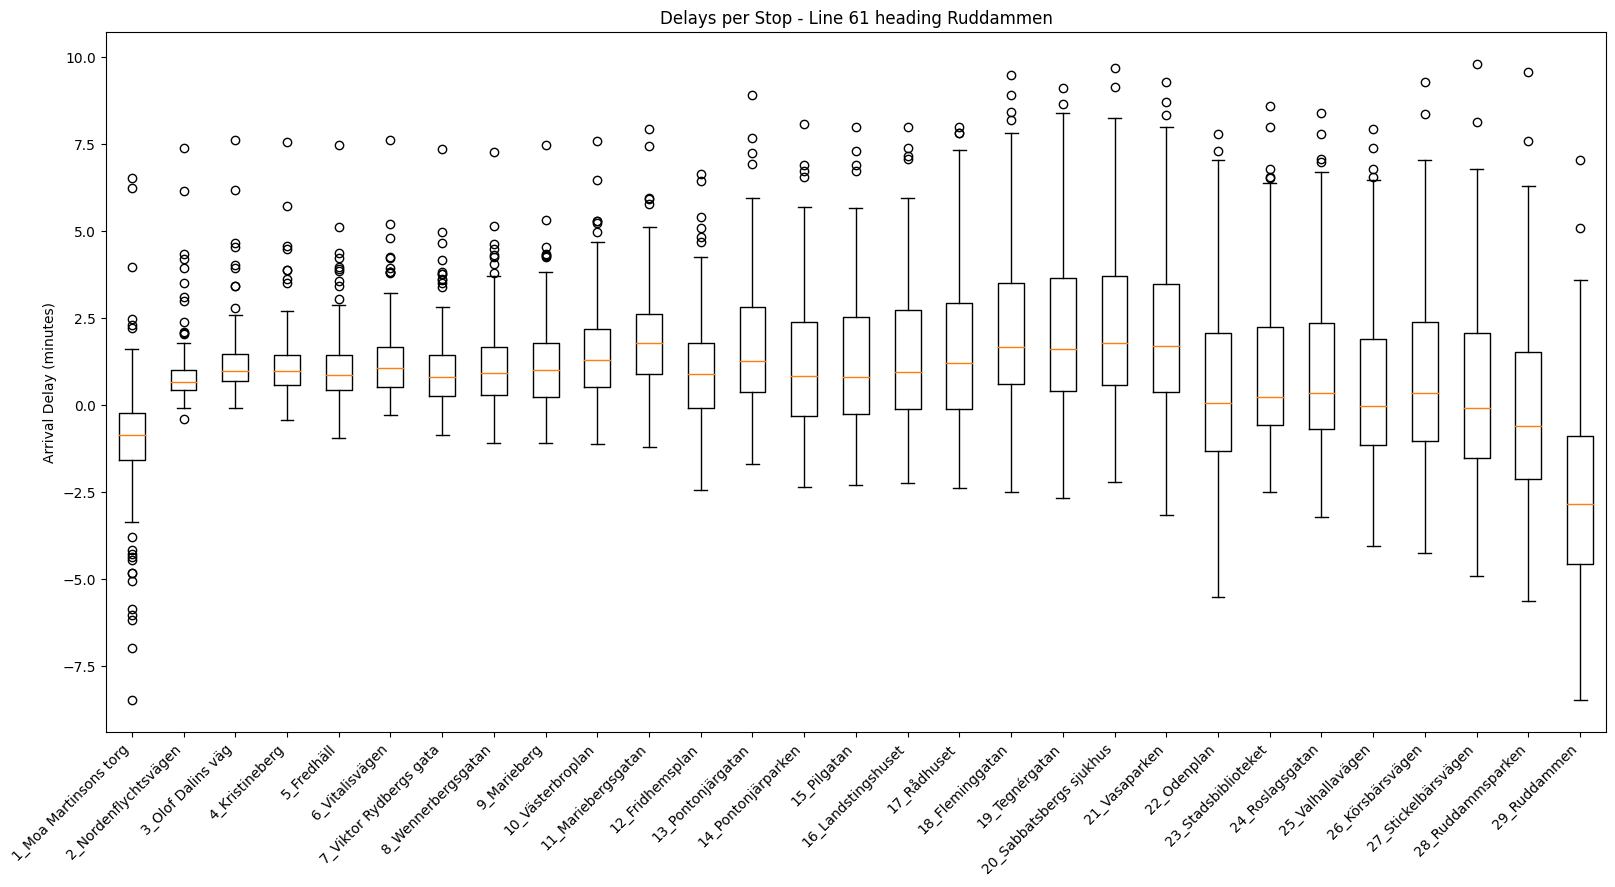

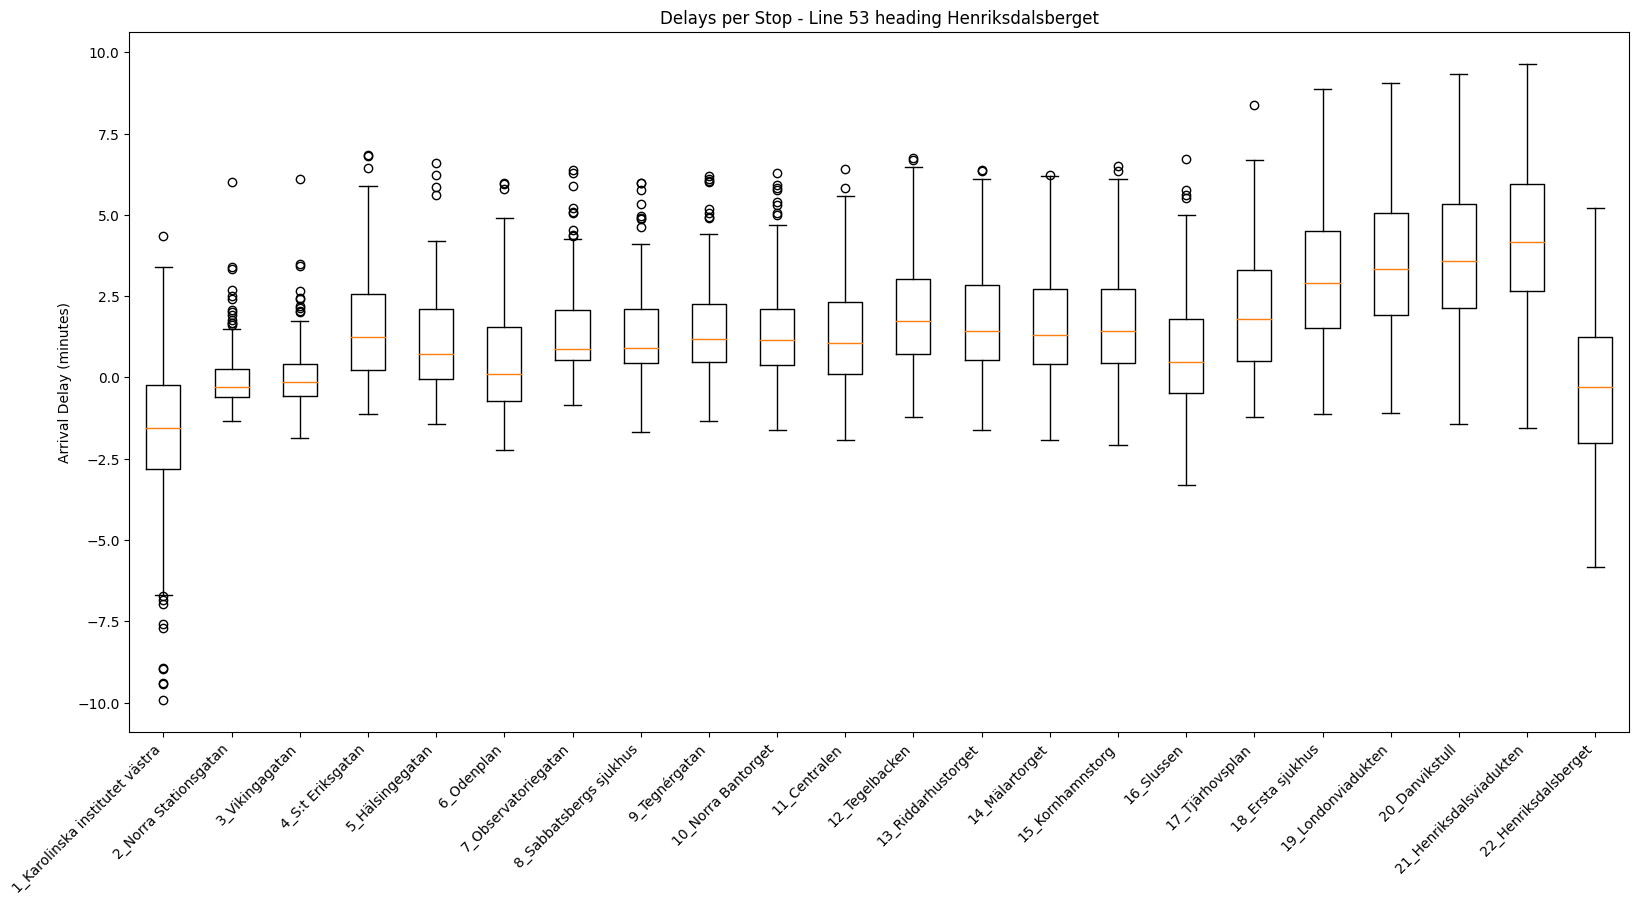

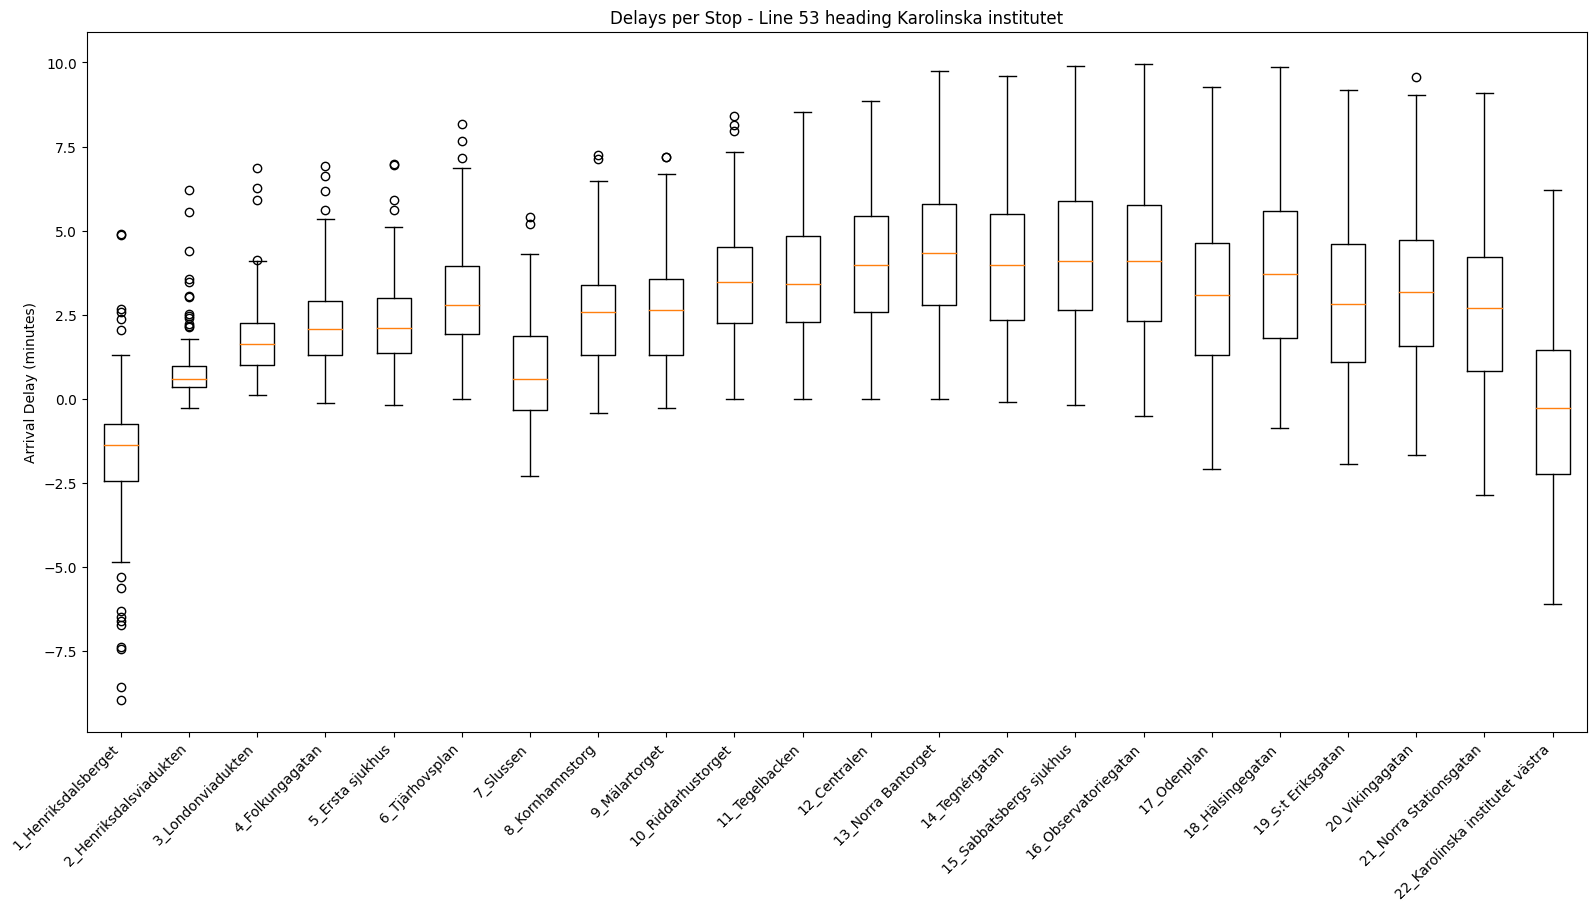

In [46]:
import matplotlib.pyplot as plt

performances_per_lines = {}

for line in df['route_short_name'].unique():
    for dest in df['stop_headsign'].unique():
        subset = df.loc[(df['route_short_name'] == line) & (df['stop_headsign'] == dest)]

        if subset.empty:
            continue

        d = []
        labels = []

        print(line)
        print(dest)
        print(subset['stop_sequence_sched'].unique())

        performances_per_lines[str(line) + '_' + dest] = subset

        for stop in sorted(subset['stop_sequence_sched'].unique()):
            stop_subset = subset.loc[subset['stop_sequence_sched'] == stop]
            values = stop_subset['arrival_delay_minutes'].dropna().values

            if len(values) > 0:
                stop_name = stop_subset['stop_name'].iloc[0]
                d.append(values)
                labels.append(f"{stop}_{stop_name}")

        if d:  # ne trace le graphe que s'il y a des données
            fig = plt.figure(figsize=(15, 7))
            ax = fig.add_axes([0, 0, 1, 1])
            bp = ax.boxplot(d)
            ax.set_xticklabels(labels, rotation=45, ha='right')

            ax.set_ylabel("Arrival Delay (minutes)")
            ax.set_title(f"Delays per Stop - Line {line} heading {dest}")

plt.show()


In [47]:
performances_per_lines.keys()

dict_keys(['74_Sickla udde', '74_Hornsberg', '61_Hornsberg', '61_Ruddammen', '53_Henriksdalsberget', '53_Karolinska institutet'])

In [87]:
performances_per_lines['74_Sickla udde'].head()

,Unnamed: 0,trip_id,start_date,schedule_relationship,stop_sequence_real,stop_id,arrival_time_real,arrival_delay,departure_time_real,departure_delay,...,drop_off_booking_rule_id,stop_name,stop_lat,stop_lon,location_type,parent_station,platform_code,file,arrival_delay_minutes,dwell_time
0,246,14010000664218434,20250310,0,1,9022001010262001,2025-03-10 06:02:14,-106.0,2025-03-10 06:04:03,3.0,...,NaN,Moa Martinsons torg,59.339563,18.004969,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-15-18Z.pb,-1.766667,0 days 00:01:49
1,247,14010000664218434,20250310,0,2,9022001010429004,2025-03-10 06:05:18,-10.0,2025-03-10 06:05:28,0.0,...,NaN,Strandbergsgatan,59.337527,18.008290,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-15-18Z.pb,-0.166667,0 days 00:00:10
2,254,14010000664218434,20250310,0,3,9022001010473002,2025-03-10 06:06:53,-10.0,2025-03-10 06:07:11,8.0,...,NaN,Lindhagensgatan,59.333497,18.016235,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-17-09Z.pb,-0.166667,0 days 00:00:18
3,264,14010000664218434,20250310,0,4,9022001010421001,2025-03-10 06:09:12,0.0,2025-03-10 06:09:21,9.0,...,NaN,Mariebergsgatan,59.331148,18.023381,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-19-58Z.pb,0.000000,0 days 00:00:09
4,268,14010000664218434,20250310,0,5,9022001010645001,2025-03-10 06:10:52,18.0,2025-03-10 06:11:04,30.0,...,NaN,Västerbroplan,59.327891,18.022024,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-21-35Z.pb,0.300000,0 days 00:00:12


In [88]:
dest = '74_Sickla udde'
df = performances_per_lines[dest]
df_trips = df.groupby('trip_id').agg(
    start_date=pd.NamedAgg(column="departure_time_real", aggfunc="min"),
    mean_dwell_time = pd.NamedAgg(column="dwell_time", aggfunc="mean"),
    mean_arrival_delay = pd.NamedAgg(column="arrival_delay_minutes", aggfunc="mean"),
    max_arrival_delay = pd.NamedAgg(column="arrival_delay_minutes", aggfunc="max"))

In [89]:
df_trips

,start_date,mean_dwell_time,mean_arrival_delay,max_arrival_delay
trip_id,,,,
14010000664218434,2025-03-10 06:04:03,0 days 00:00:12.519230769,3.430769,7.100000
14010000664219036,2025-03-10 06:24:17,0 days 00:00:16.730769230,1.205128,4.000000
14010000664219560,2025-03-10 06:44:51,0 days 00:00:15.480769230,0.631090,3.083333
14010000664220110,2025-03-10 07:02:01,0 days 00:00:24.852272727,-0.260795,2.416667
14010000664220397,2025-03-10 07:12:13,0 days 00:00:33.147727272,1.087500,5.300000
14010000664221809,2025-03-10 07:52:12,0 days 00:00:27.829545454,1.272348,5.083333
14010000664222255,2025-03-10 08:02:16,0 days 00:00:28.102272727,1.588826,6.466667
14010000664222544,2025-03-10 08:12:39,0 days 00:00:26.840909090,2.344697,6.083333
14010000664223286,2025-03-10 08:32:51,0 days 00:00:19.852272727,1.236742,5.550000


df_trips

In [90]:
def func(val):
    if isinstance(val, str) and val != 'nan':
        return datetime.strptime(val, '%Y-%m-%d %H:%M:%S').strftime('%H:%M')
    else:
        return None

df_trips['start_hour']=pd.to_datetime(df_trips['start_date'].apply(lambda x: func(x)))

Text(0, 0.5, 'Arrival delay in minutes')

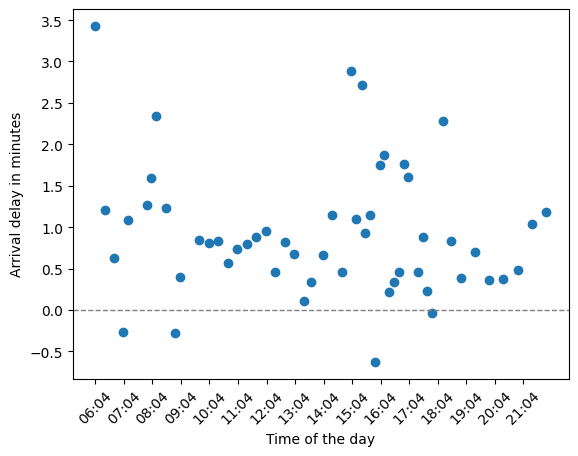

In [91]:
plt.scatter(df_trips['start_hour'],df_trips['mean_arrival_delay'])
# Format x-axis: ticks every 30 minutes
locator = pd.date_range(start=df_trips['start_hour'].min(),
                        end=df_trips['start_hour'].max(),
                        freq='1h')

plt.xticks(locator, [ts.strftime('%H:%M') for ts in locator], rotation=45)

# Optional: horizontal line (e.g., baseline at y=0)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Time of the day")
plt.ylabel("Arrival delay in minutes")


Text(0, 0.5, 'Mean dwell time in minutes')

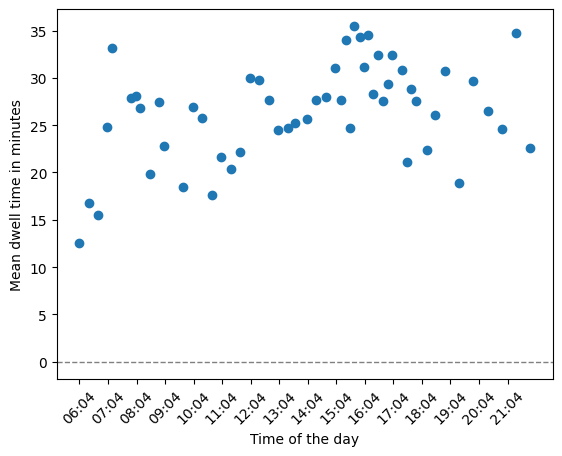

In [112]:
def func(val):
    return val.total_seconds()

plt.scatter(df_trips['start_hour'],df_trips['mean_dwell_time'].apply(lambda x: func(x)))
# Format x-axis: ticks every 30 minutes
locator = pd.date_range(start=df_trips['start_hour'].min(),
                        end=df_trips['start_hour'].max(),
                        freq='1h')

plt.xticks(locator, [ts.strftime('%H:%M') for ts in locator], rotation=45)

# Optional: horizontal line (e.g., baseline at y=0)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Time of the day")
plt.ylabel("Mean dwell time in minutes")

In [110]:
df_trips['mean_dwell_time'].dtype

dtype('<m8[ns]')

Text(0, 0.5, 'Maximum delay of the trip')

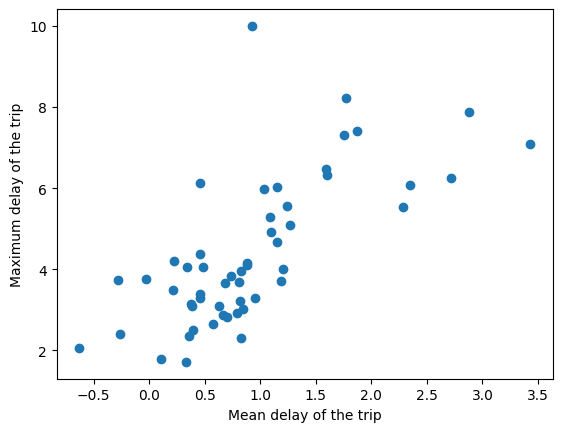

In [92]:
plt.scatter(df_trips['mean_arrival_delay'],df_trips['max_arrival_delay'])
plt.xlabel("Mean delay of the trip")
plt.ylabel("Maximum delay of the trip")

In [77]:
df_trips['start_hour']

trip_id
14010000664218434    06:04
14010000664219036    06:24
14010000664219560    06:44
14010000664220110    07:02
14010000664220397    07:12
14010000664221809    07:52
14010000664222255    08:02
14010000664222544    08:12
14010000664223286    08:32
14010000664223876    08:52
14010000664224288    09:02
14010000664225334    09:42
14010000664225873    10:02
14010000664226373    10:22
14010000664226899    10:42
14010000664227436    11:02
14010000664227966    11:22
14010000664228523    11:42
14010000664229005    12:02
14010000664229531    12:22
14010000664230054    12:42
14010000664230589    13:02
14010000664231118    13:22
14010000664231640    13:37
14010000664232176    14:02
14010000664232640    14:22
14010000664233197    14:42
14010000664233873    15:02
14010000664234112    15:13
14010000664234605    15:25
14010000664234922    15:32
14010000664235308    15:42
14010000664235709    15:53
14010000664236139    16:02
14010000664236412    16:11
14010000664236860    16:21
14010000664237221   